In [3]:
import numpy as np
from decimal import Decimal
import matplotlib.pyplot as plt
import rosbag
import pandas as pd
from scipy import integrate
from scipy.interpolate import interp1d
from IPython.display import display
#from mpldatacursor import datacursor
import time
import math
import cv2 as cv2
from cv_bridge import CvBridge
import argparse
import os

In [2]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images
    

In [3]:
back_images=load_images_from_folder('/media/maleen/malen_ssd/phd/critical_ams_data/2020-02-28-Wentworth/image_data/2020-02-28-Wentworth-P1/ground-rgb/')

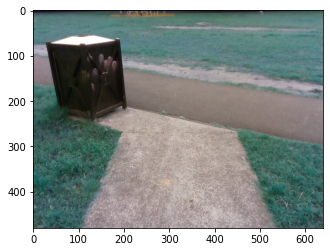

In [4]:
plt.imshow(back_images[20])

In [5]:
class CropLayer(object):
    def __init__(self, params, blobs):
        # initialize our starting and ending (x, y)-coordinates of
        # the crop
        self.startX = 0
        self.startY = 0
        self.endX = 0
        self.endY = 0

    def getMemoryShapes(self, inputs):
        # the crop layer will receive two inputs -- we need to crop
        # the first input blob to match the shape of the second one,
        # keeping the batch size and number of channels
        (inputShape, targetShape) = (inputs[0], inputs[1])
        (batchSize, numChannels) = (inputShape[0], inputShape[1])
        (H, W) = (targetShape[2], targetShape[3])

        # compute the starting and ending crop coordinates
        self.startX = int((inputShape[3] - targetShape[3]) / 2)
        self.startY = int((inputShape[2] - targetShape[2]) / 2)
        self.endX = self.startX + W
        self.endY = self.startY + H

        # return the shape of the volume (we'll perform the actual
        # crop during the forward pass
        return [[batchSize, numChannels, H, W]]

    def forward(self, inputs):
        # use the derived (x, y)-coordinates to perform the crop
        return [inputs[0][:, :, self.startY:self.endY,
                self.startX:self.endX]]

In [6]:
# load our serialized edge detector from disk
print("[INFO] loading edge detector...")
protoPath ="hed_model/deploy.prototxt"
modelPath = "hed_model/hed_pretrained_bsds.caffemodel"
net = cv2.dnn.readNetFromCaffe(protoPath, modelPath)
net.setPreferableBackend(cv2.dnn.DNN_BACKEND_CUDA)
net.setPreferableTarget(cv2.dnn.DNN_TARGET_CUDA)

# register our new layer with the model
cv2.dnn_registerLayer("Crop", CropLayer)

[INFO] loading edge detector...


In [8]:
%%time
i=1
#back_rgb_time.size


for num in range(0,100):
    
    img=back_images[num]
    
    (H, W) = img.shape[:2]
    
    # construct a blob out of the input image for the Holistically-Nested
    # Edge Detector

    blob = cv2.dnn.blobFromImage(img, scalefactor=1, size=(W, H),
        mean=(104.00698793, 116.66876762, 122.67891434),
        swapRB=False, crop=False)
    
    #mean=(104.00698793, 116.66876762, 122.67891434),
    
    net.setInput(blob)
    hed = net.forward()
    hed = cv2.resize(hed[0, 0], (W, H))
    hed = (255 * hed).astype("uint8")
    
    ret1,thresh1 = cv2.threshold(hed,160,255,cv2.THRESH_BINARY)

    #gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    
    #gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # remove noise
    #img = cv2.GaussianBlur(gray,(5,5),0)

    # convolute with proper kernels
    #laplacian = cv2.Laplacian(img,cv2.CV_64F)
    #sobelx = cv2.Sobel(hed,cv2.CV_64F,1,0,ksize=3)  # x
    #sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)  # y

    #plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
    #plt.title('Original'), plt.xticks([]), plt.yticks([])
    #plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
    #plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
    #plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
    #plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
    #plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
    #plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

    #plt.show()
    
    
    #kernel1 = np.ones((2,2),np.uint8)
    
    #kernel2 = np.ones((2,2),np.uint8)
    
    #erosion = cv2.erode(hed, kernel1,iterations=3)
    #dilate = cv2.dilate(erosion, kernel2,iterations=2)
    
    
    
    #convert = cv2.convertScaleAbs(opening)
    #blurred = cv2.GaussianBlur(convert, (5, 5), 0)
    
    #canny = cv2.Canny(blurred, 100, 200)
    #plt.imshow(dilate)
    #plt.show()
    

   # cv2.imwrite('/home/ravindra/HDD-4TB/Maleen/image_data/edge/'+ filename +"-edge"+"-"+ str(num+1) + ".jpg",thresh1) #[int(cv2.IMWRITE_JPEG_QUALITY), 100]) 

print(num)

99
CPU times: user 5.22 s, sys: 386 ms, total: 5.6 s
Wall time: 4.07 s


In [14]:
# ret1,thresh1 = cv2.threshold(hed,160,255,cv2.THRESH_BINARY)

In [15]:
# plt.imshow(thresh1,'gray')
# plt.show()
# cv2.imwrite('/home/maleen/test.jpg',thresh1)

\